In [1]:
# 필요한 모듈 import
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# train, test 데이터 가져오기
# booking_status는 0, 1로 바꾸어 가져오기
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# train_test_data = [train, test]
# for data in train_test_data:

train["booking_status"] = train["booking_status"].replace({'Canceled':1, 'Not_Canceled':0})

train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,1
1,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,1
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,0
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,0
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25392 entries, 0 to 25391
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            25392 non-null  object 
 1   no_of_adults                          25392 non-null  int64  
 2   no_of_children                        25392 non-null  int64  
 3   no_of_weekend_nights                  25392 non-null  int64  
 4   no_of_week_nights                     25392 non-null  int64  
 5   type_of_meal_plan                     25392 non-null  object 
 6   required_car_parking_space            25392 non-null  int64  
 7   room_type_reserved                    25392 non-null  object 
 8   lead_time                             25392 non-null  int64  
 9   arrival_year                          25392 non-null  int64  
 10  arrival_month                         25392 non-null  int64  
 11  arrival_date   

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            10883 non-null  object 
 1   no_of_adults                          10883 non-null  int64  
 2   no_of_children                        10883 non-null  int64  
 3   no_of_weekend_nights                  10883 non-null  int64  
 4   no_of_week_nights                     10883 non-null  int64  
 5   type_of_meal_plan                     10883 non-null  object 
 6   required_car_parking_space            10883 non-null  int64  
 7   room_type_reserved                    10883 non-null  object 
 8   lead_time                             10883 non-null  int64  
 9   arrival_year                          10883 non-null  int64  
 10  arrival_month                         10883 non-null  int64  
 11  arrival_date   

In [5]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
# from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

# import folium
# from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [6]:
data = train[train['booking_status'] == 0]
px.box(data_frame = data, x = 'room_type_reserved')

In [7]:
## for how long do people stay at the hotels? ##
filter = train['booking_status'] == 0
data = train[filter]
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,0
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,0
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,0
6,INN35541,2,0,0,1,Meal Plan 1,0,Room_Type 1,8,2018,2,16,Online,0,0,0,85.00,0,0
7,INN27458,1,0,1,1,Meal Plan 2,0,Room_Type 1,301,2018,7,30,Offline,0,0,0,90.00,0,0


In [8]:
data.shape

(17114, 19)

In [9]:
# data['no_of_total_nights'] = data['no_of_weekend_nights'] + data['no_of_week_nights']
# data.head()

train['no_of_total_nights'] = train['no_of_weekend_nights'] + train['no_of_week_nights']
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_total_nights
0,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,1,4
1,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,1,4
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,0,5
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,0,2
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,0,4


In [10]:
train['no_of_total_guests'] = train['no_of_adults'] + train['no_of_children']
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_total_nights,no_of_total_guests
0,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,1,4,2
1,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,1,4,2
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,0,5,2
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,0,2,2
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,0,4,3


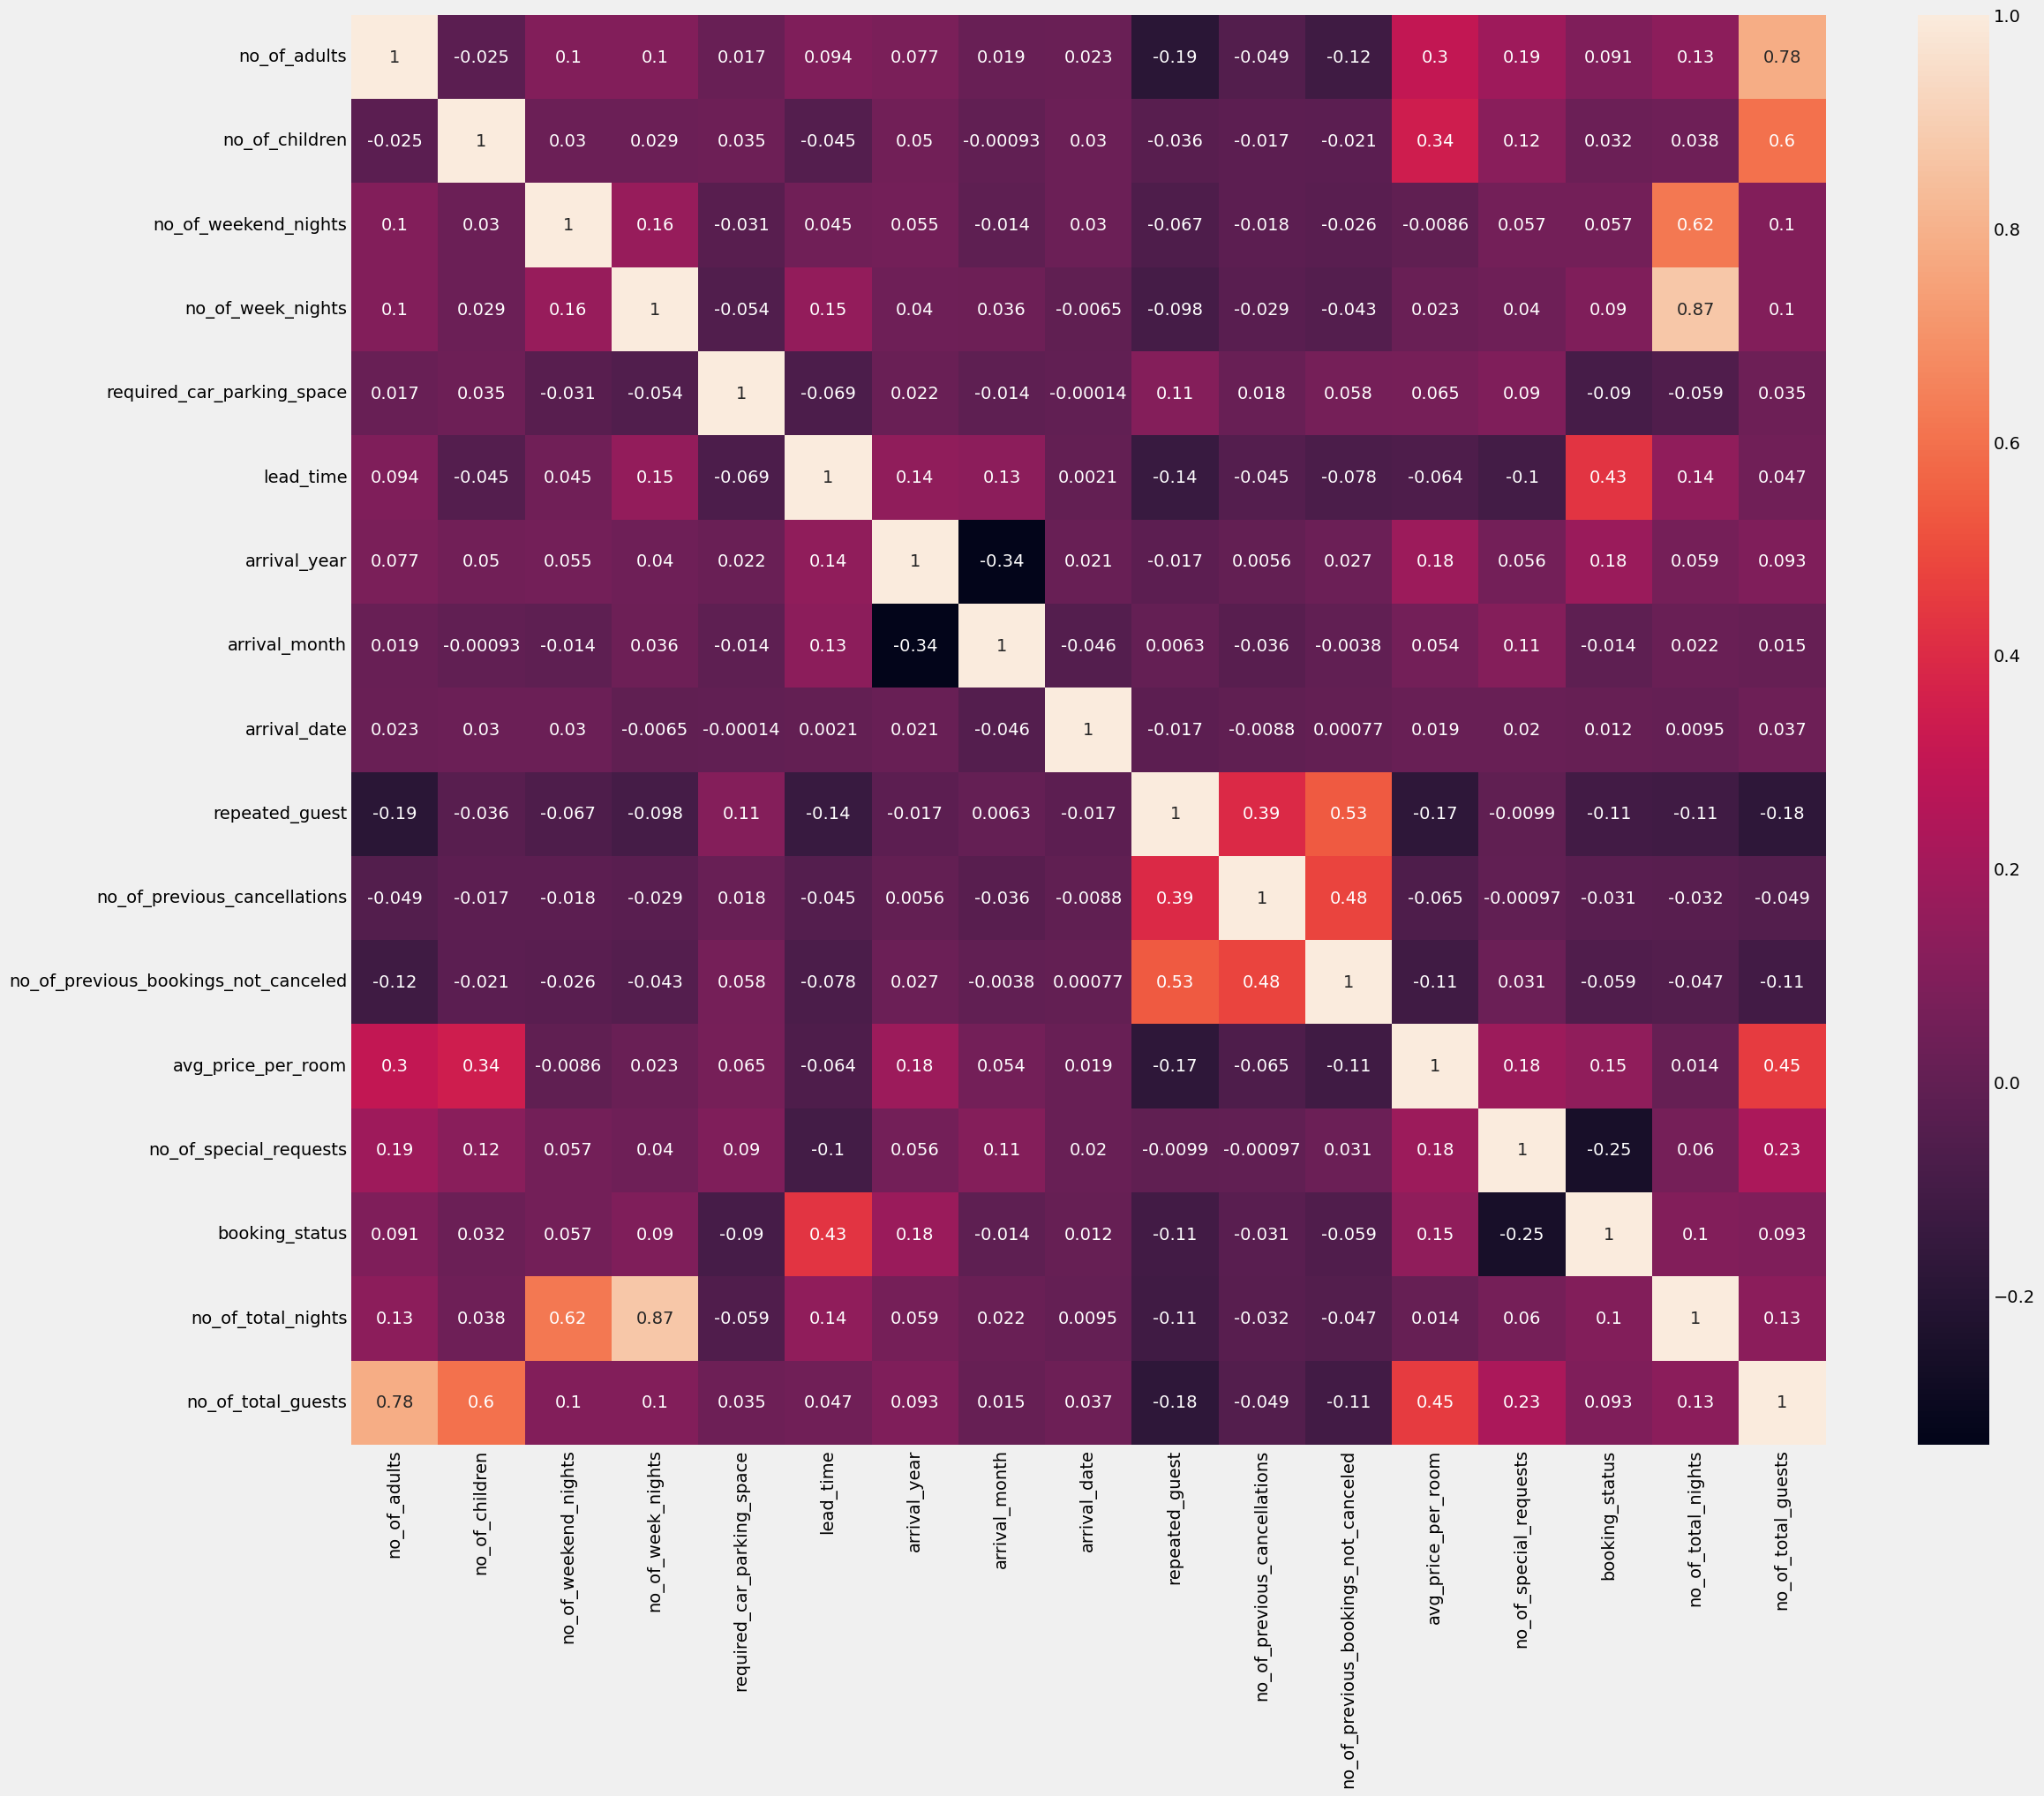

In [11]:
plt.figure(figsize=(24, 20))
corr = train.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [12]:
no_guests = train['no_of_total_guests'] == 0
train = train[~no_guests]

In [13]:
# train.drop('no_of_total_guests', axis=1, inplace=True)

In [14]:
correlation = train.corr()['booking_status'].abs().sort_values(ascending = False)
correlation

booking_status                          1.000000
lead_time                               0.432341
no_of_special_requests                  0.254901
arrival_year                            0.175495
avg_price_per_room                      0.145585
repeated_guest                          0.106916
no_of_total_nights                      0.099812
no_of_total_guests                      0.092777
no_of_adults                            0.091378
required_car_parking_space              0.090402
no_of_week_nights                       0.090325
no_of_previous_bookings_not_canceled    0.058706
no_of_weekend_nights                    0.057094
no_of_children                          0.031683
no_of_previous_cancellations            0.030817
arrival_month                           0.014238
arrival_date                            0.011965
Name: booking_status, dtype: float64

일단 아무것도 drop 안하고 진행하겠음 </br>
아니 뭘 지워야됨?

In [15]:
feature_drop = [
    'arrival_date', 'arrival_month', 'no_of_previous_cancellations', 'no_of_children', 'no_of_weekend_nights'
]

In [16]:
train.drop(feature_drop, axis=1, inplace=True)
# train.drop(['Booking_ID'], axis=1, inplace=True)

In [17]:
train.head()

,Booking_ID,no_of_adults,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,market_segment_type,repeated_guest,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_total_nights,no_of_total_guests
0,INN29581,2,3,Meal Plan 1,0,Room_Type 1,200,2018,Online,0,0,90.95,0,1,4,2
1,INN06326,2,3,Meal Plan 1,0,Room_Type 1,79,2018,Online,0,0,90.95,1,1,4,2
2,INN33900,2,4,Meal Plan 1,0,Room_Type 4,78,2018,Online,0,0,99.45,1,0,5,2
3,INN00721,2,0,Meal Plan 1,0,Room_Type 1,61,2017,Offline,0,0,91.00,0,0,2,2
4,INN22121,2,4,Meal Plan 1,0,Room_Type 1,201,2018,Online,0,0,82.28,3,0,4,3


In [18]:
cat_cols = [col for col in train.columns if train[col].dtype == object]
cat_cols

['Booking_ID',
 'type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type']

In [19]:
cat_df = train[cat_cols]
cat_df.head()

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type
0,INN29581,Meal Plan 1,Room_Type 1,Online
1,INN06326,Meal Plan 1,Room_Type 1,Online
2,INN33900,Meal Plan 1,Room_Type 4,Online
3,INN00721,Meal Plan 1,Room_Type 1,Offline
4,INN22121,Meal Plan 1,Room_Type 1,Online


In [20]:
cat_df.drop(['Booking_ID'], axis=1, inplace=True)

In [21]:
cat_df.head()

,type_of_meal_plan,room_type_reserved,market_segment_type
0,Meal Plan 1,Room_Type 1,Online
1,Meal Plan 1,Room_Type 1,Online
2,Meal Plan 1,Room_Type 4,Online
3,Meal Plan 1,Room_Type 1,Offline
4,Meal Plan 1,Room_Type 1,Online


In [22]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

type_of_meal_plan: 
['Meal Plan 1' 'Meal Plan 2' 'Not Selected' 'Meal Plan 3']

room_type_reserved: 
['Room_Type 1' 'Room_Type 4' 'Room_Type 6' 'Room_Type 5' 'Room_Type 2'
 'Room_Type 7' 'Room_Type 3']

market_segment_type: 
['Online' 'Offline' 'Corporate' 'Aviation' 'Complementary']



* type_of_meal_plan: Meal Plan 3은 숫자가 너무 작아서 Meal Plan 1에 포함시킴

1, 2, 3이 차등이 있는지는 잘 모르겠지만 숫자가 증가해도 비중에 커서 영향이 안가는 Meal Plan 1에 포함시킴

In [23]:
cat_df['type_of_meal_plan'].value_counts()

Meal Plan 1     19492
Not Selected     3560
Meal Plan 2      2338
Meal Plan 3         2
Name: type_of_meal_plan, dtype: int64

* room_type_reserved: Room Type 3은 Room Type 4에 포함시킴


1, 2, 3이라는 숫자가 차등이라는 의미가 있는지는 모르겠지만...

In [24]:
cat_df['room_type_reserved'].value_counts()

Room_Type 1    19684
Room_Type 4     4242
Room_Type 6      667
Room_Type 2      498
Room_Type 5      186
Room_Type 7      111
Room_Type 3        4
Name: room_type_reserved, dtype: int64

In [25]:
cat_df['market_segment_type'].value_counts()

Online           16210
Offline           7398
Corporate         1427
Complementary      272
Aviation            85
Name: market_segment_type, dtype: int64

In [26]:
cat_df['type_of_meal_plan'] = cat_df['type_of_meal_plan'].map({
    'Meal Plan 1': 0, 'Meal Plan 2': 1, 'Not Selected 1': 2, 'Meal Plan 3': 0
})

cat_df['room_type_reserved'] = cat_df['room_type_reserved'].map({
    'Room_Type 1': 0, 'Room_Type 4': 1, 'Room_Type 6': 2, 'Room_Type 5': 3, 'Room_Type 2': 4, 'Room_Type 7': 5, 'Room_Type 3': 6
})

cat_df['market_segment_type'] = cat_df['market_segment_type'].map({
    'Online': 0, 'Offline': 1, 'Corporate': 2, 'Complementary': 3, 'Aviation': 4
})

In [27]:
cat_df.head()

,type_of_meal_plan,room_type_reserved,market_segment_type
0,0.0,0,0
1,0.0,0,0
2,0.0,1,0
3,0.0,0,1
4,0.0,0,0


In [28]:
num_df = train.drop(columns=cat_cols, axis=1)
num_df.drop('booking_status', axis=1, inplace=True)
num_df

,no_of_adults,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_total_nights,no_of_total_guests
0,2,3,0,200,2018,0,0,90.95,0,4,2
1,2,3,0,79,2018,0,0,90.95,1,4,2
2,2,4,0,78,2018,0,0,99.45,1,5,2
3,2,0,0,61,2017,0,0,91.00,0,2,2
4,2,4,0,201,2018,0,0,82.28,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...
25387,2,2,0,43,2017,0,0,55.00,2,4,2
25388,1,2,0,102,2017,0,0,80.00,0,2,1
25389,2,2,0,5,2018,0,0,110.00,1,2,2
25390,2,3,0,213,2018,0,0,130.00,0,3,2


In [29]:
num_df.var()

no_of_adults                               0.269407
no_of_week_nights                          1.950488
required_car_parking_space                 0.030367
lead_time                               7352.365766
arrival_year                               0.147944
repeated_guest                             0.024533
no_of_previous_bookings_not_canceled       3.308517
avg_price_per_room                      1229.698231
no_of_special_requests                     0.618668
no_of_total_nights                         3.098408
no_of_total_guests                         0.420506
dtype: float64

In [30]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
# num_df['arrival_month'] = np.log(num_df['arrival_month'] + 1)
# num_df['arrival_date'] = np.log(num_df['arrival_date'] + 1)
num_df['avg_price_per_room'] = np.log(num_df['avg_price_per_room'] + 1)

In [31]:
num_df.var()

no_of_adults                            0.269407
no_of_week_nights                       1.950488
required_car_parking_space              0.030367
lead_time                               2.159708
arrival_year                            0.147944
repeated_guest                          0.024533
no_of_previous_bookings_not_canceled    3.308517
avg_price_per_room                      0.420781
no_of_special_requests                  0.618668
no_of_total_nights                      3.098408
no_of_total_guests                      0.420506
dtype: float64

In [32]:
num_df.head()

,no_of_adults,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_total_nights,no_of_total_guests
0,2,3,0,5.303305,2018,0,0,4.521245,0,4,2
1,2,3,0,4.382027,2018,0,0,4.521245,1,4,2
2,2,4,0,4.369448,2018,0,0,4.609660,1,5,2
3,2,0,0,4.127134,2017,0,0,4.521789,0,2,2
4,2,4,0,5.308268,2018,0,0,4.422208,3,4,3


In [33]:
X_train = pd.concat([cat_df, num_df], axis=1)
y_train = train['booking_status']

In [34]:
X_train.shape, y_train.shape

((25392, 14), (25392,))

In [35]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [36]:
X_train.head()

,type_of_meal_plan,room_type_reserved,market_segment_type,no_of_adults,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_total_nights,no_of_total_guests
0,0.0,0,0,2,3,0,5.303305,2018,0,0,4.521245,0,4,2
1,0.0,0,0,2,3,0,4.382027,2018,0,0,4.521245,1,4,2
2,0.0,1,0,2,4,0,4.369448,2018,0,0,4.609660,1,5,2
3,0.0,0,1,2,0,0,4.127134,2017,0,0,4.521789,0,2,2
4,0.0,0,0,2,4,0,5.308268,2018,0,0,4.422208,3,4,3


In [37]:
y_train.head()

0    1
1    1
2    0
3    0
4    0
Name: booking_status, dtype: int64

In [38]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 25392 entries, 0 to 25391
Series name: booking_status
Non-Null Count  Dtype
--------------  -----
25392 non-null  int64
dtypes: int64(1)
memory usage: 396.8 KB


### Building Model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [48]:
clf_tree1 = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=0,
    min_samples_split=15,
    min_samples_leaf=2,
    max_features=4,
    # random_state=1
)
scoring = 'accuracy'
score = cross_val_score(clf_tree1, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[nan nan nan nan nan nan nan nan nan nan]


In [ ]:
# Decision Tree score
round(np.mean(score) * 100, 2)

In [ ]:
from sklearn.impute import SimpleImputer

# create an imputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# impute missing values in X_train
X_train = imputer.fit_transform(X_train)

# impute missing values in X_test
X_test = imputer.transform(X_test)

# train and evaluate the model
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','KNN'],
    'Score' : [acc_lr, acc_dtc, acc_rd_clf, acc_knn]})


models.sort_values(by = 'Score', ascending = False)